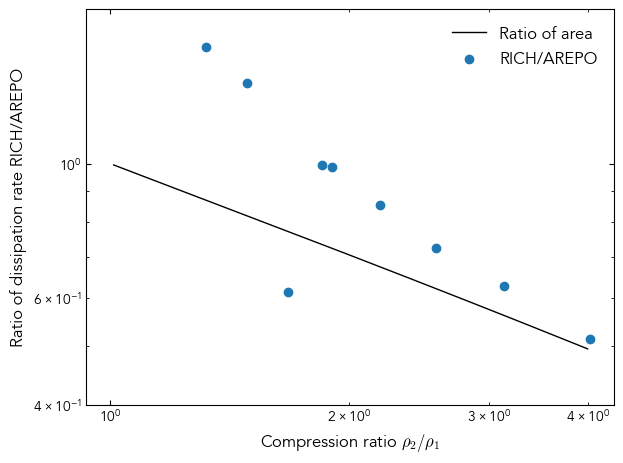

In [ ]:
# Compare absolute areas and their ratio between Rayleigh line and
# (i) Poisson adiabat, (ii) Hugoniot, vs compression ratio rho2/rho1

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../academic-mplstyle/nice.mplstyle')

# ------------------
# Parameters
# ------------------
gamma = 5.0 / 3.0
rho1 = 1
P1 = 1

# ------------------
# Thermodynamic curves
# ------------------
def P_poisson(rho):
    return P1 * (rho / rho1) ** gamma

def P_hugoniot(rho, P_ref, rho_ref): # uses rho2, P2 as reference point
    return P_ref * ((gamma + 1)*rho - (gamma - 1)*rho_ref) / ((gamma + 1)*rho_ref - (gamma - 1)*rho)

def P_rayleigh(v, v1, v2, P2):
    return P1 + (P2 - P1) * (v - v1) / (v2 - v1)

# ------------------
# Compression ratios
# ------------------
eta_max = (gamma + 1) / (gamma - 1)
etas = np.linspace(1.01, 0.999*eta_max, 200)

A_poisson = []
A_hugoniot = []

# ------------------
# Loop
# ------------------
for eta in etas:
    rho2 = eta * rho1
    P2 = P_hugoniot(rho2, P_ref=P1, rho_ref=rho1)

    v1 = 1.0 / rho1
    v2 = 1.0 / rho2

    # Use a linear spacing for specific volume v
    v_axis = np.linspace(v2, v1, 3000) 
    
    # Calculate pressures along the v_axis
    P_R = P1 + (P2 - P1) * (v_axis - v1) / (v2 - v1)
    P_H = P_hugoniot(1.0 / v_axis, P_ref=P2, rho_ref=rho2)
    P_A = P_poisson(1.0 / v_axis)

    # Area 1: The "Lens" between Rayleigh and Hugoniot
    # This represents the entropy production path deviation
    # A_h = np.trapezoid(P_R - P_H, v_axis)
    A_h = np.sum((P_R - P_H)[1:]*(v_axis[1:]-v_axis[:-1]))

    # Area 2: The difference between Rayleigh and Adiabat
    # This is much larger because P_R ends at P2_shock, not P2_adiabatic
    # A_p = np.trapezoid(P_R - P_A, v_axis)
    A_p = np.sum((P_R - P_A)[1:]*(v_axis[1:]-v_axis[:-1]))

    A_poisson.append(A_p)
    A_hugoniot.append(A_h)

A_poisson = np.array(A_poisson)
A_hugoniot = np.array(A_hugoniot)
ratio = A_hugoniot / A_poisson

# ------------------
# Load data
# ------------------
data = np.loadtxt('/home/hey4/rich_tde/data/processed/ShockTubeIdealGas/shocktube_tests.txt')
R, diss_rich, diss_arepo, diss_du = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

# # ------------------
# # Plot absolute areas
# # ------------------
# plt.figure()
# plt.plot(etas, A_poisson, label="|Rayleigh - Poisson area|")
# plt.plot(etas, A_hugoniot, label="|Rayleigh - Hugoniot area|")
# plt.xlabel(r"Compression ratio $\rho_2/\rho_1$")
# plt.ylabel(r"Absolute area in $P$-$1/\rho$ plane")
# plt.legend()
# plt.tight_layout()
# plt.show()

# ------------------
# Plot ratio
# ------------------
plt.figure()
plt.plot(etas, ratio, color='k', label='Ratio of area')
plt.scatter(R, diss_rich/diss_arepo, label=r'RICH/AREPO')
plt.xlabel(r"Compression ratio $\rho_2/\rho_1$")
plt.ylabel(r"Ratio of dissipation rate RICH/AREPO")
plt.ylim(0.4,1.8)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
# plt.savefig('../reports/figures/area-ratio-log.pdf')
plt.show()


In [ ]:
import unyt as u
u.unyt_array.from_hdf5(filename='/home/hey4/rich_tde/data/processed/ShockTubeIdealGas/shocktube_tests.hdf5', dataset_name='rho2/rho1')

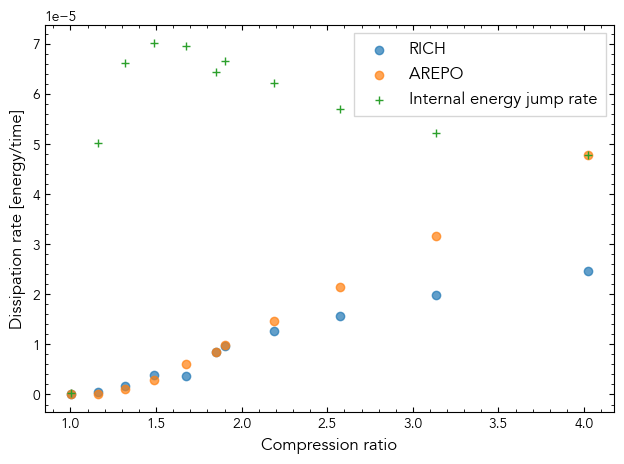

In [ ]:
plt.scatter(R, diss_rich, label='RICH', alpha=0.7)
plt.scatter(R, diss_arepo, label='AREPO', alpha=0.7)
plt.scatter(R, diss_du, label='Internal energy jump rate', marker='+')
plt.xlabel('Compression ratio')
plt.ylabel('Dissipation rate [energy/time]')
plt.legend(frameon=True)
plt.tight_layout()
# plt.savefig('../reports/figures/diss-rate-compare.pdf')
plt.show()

/zfsstore/user/hey4/rich_tde/richio/richio/data.py:55: UserWarning: No snapshot number found in path: /home/hey4/rich_tde/data/raw/ShockTubeIdealGas/PL1.0PR0.000DL1.0DR0.250/snap_final.h5
  warnings.warn(f"No snapshot number found in path: {self.path}")


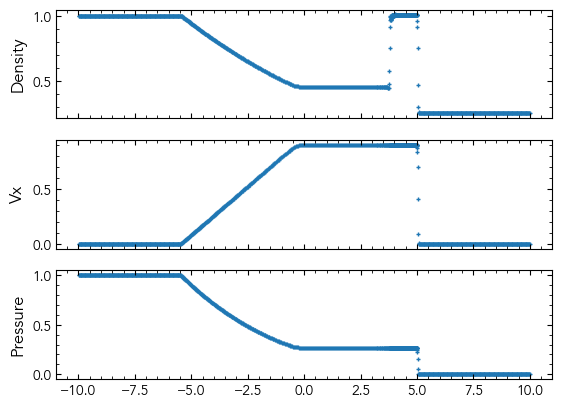

In [ ]:
# Check validity of data
import richio
snap = richio.load('/home/hey4/rich_tde/data/raw/ShockTubeIdealGas/PL1.0PR0.000DL1.0DR0.250/snap_final.h5')

fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].scatter(snap.x, snap.density, marker='+',  s=10)
ax[0].set_ylabel('Density')

ax[1].scatter(snap.x, snap.velocity_x, marker='+',  s=10)
ax[1].set_ylabel('Vx')

ax[2].scatter(snap.x, snap.P, marker='+', s=10)
ax[2].set_ylabel('Pressure')

plt.show()